In [134]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [135]:
ads_clients_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/ads_clients_data.csv', parse_dates=['date', 'create_date'])
ads_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/ads_data.csv', parse_dates=['date', 'time'])

In [136]:
df1.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [137]:
df2.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [138]:
df2.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

Могут понадобиться:

pivot()
fillna()
- **План решения задания**
    
    В этом задании мы считаем среднее число кликов и показов по всем рекламным объявлениям. 
    
    Это можно сделать следующим образом - сгруппировать данные по объявлению (`ad_id`) и событию (`event`) и посчитать число событий для каждого объявления в каждом типе. 
    
    Далее можно сделать сводную табличку по всем типам событий и всем рекламам, заменить NA на 0, посчитать среднее и округлить. 
    
    Либо можно сгруппировать по типу события, посчитать сумму, разделить на число всех реклам и округлить
    
- **Почему после группировки нельзя просто посчитать среднее?**
    
    В связи с особенностями записи данных здесь нельзя просто провести группировку и посчитать среднее - так как для некоторых объявлений нет какого-то типа событий вообще
    
    Например, для таких данных:
    
    ```python
    ad_id   event     
    1       click
    1       view
    2       view
    2       view
    ```
    
    После группировки по `ad_id` и `event` с подсчётом числа строк (то есть событий) должен получиться такой ответ
    
    ```python
    ad_id   event   number   
    1       click   1
    1       view    1
    2       view    2
    ```
    
    Обратите внимание, что мы не получили строки
    
    ```python
    ad_id   event   number   
    2       click   0
    ```
    
    Из-за этого, если просто посчитать среднее по группам, то оно будет неверным - вот каким оно будет
    
    ```python
    event   mean   
    click   1
    view    1.5
    ```
    
    А вот каким должно быть
    
    ```python
    event   mean   
    click   0.5
    view    1.5
    ```
    
- **Как сделать сводную таблицу?**
    
    Для создания сводной таблички вам нужен датафрэйм с 3-мя колонками - значения одной станут индексом, значения другой - колонками, а значения третьей распределятся по получающейся табличке. То есть
    
    ```python
    df.pivot(index='index_column', columns='columns_column', values='values_column')
    ```
    
    Вернёт сводную таблицу, где значения `index_column` стали новым индексом, значения columns_column стали новыми столбцами, а значения `values_column` остались значениями в этой новой таблице.
    
    Размерность новой таблицы - число уникальных значений в `index_column` на число уникальных значений в `columns_column`. Если для комбинации значений `index_column` и `columns_column` не было значения в исходном датафрэйме (строки с такой комбинацией `index_column` и `columns_column` просто не было), в такой ячейке сводной таблицы будет пропущенное значение
    
- **Как заполнить пропуски нулями?**
    
    Тут пригодится метод `fillna`, принимающий аргумент, который он будет ставить вместо пропущенных значений
    
    Например,
    
    ```python
    df.fillna(144)
    ```
    
    Вернёт датафрэйм, где вместо пропусков будет стоять 144

In [139]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [140]:
event_count= ads_data.groupby(['event', 'ad_id'], as_index=False).size()

In [141]:
event_count

,event,ad_id,size
0,click,2,1
1,click,3,3
2,click,1902,1
3,click,2132,1
4,click,2494,1
...,...,...,...
1476,view,122004,100
1477,view,122013,156
1478,view,122023,68
1479,view,122031,138


Давайте посмотрим на распределение показов объявлений!

По оси x – число показов
По оси y – доля объявлений с такими показами
Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. Выберите соответствующий график:

In [142]:
event_pivot = event_count.pivot(index='ad_id', columns='event', values='size')

In [143]:
event_pivot

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,NaN,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,NaN,156.0
122023,NaN,68.0


In [144]:
event_pivot = event_pivot.fillna(0)

In [145]:
event_pivot.mean()

event
click    113.137824
view     923.131606
dtype: float64

In [146]:
sns.set(style='whitegrid')

In [147]:
ads_data.loc[ads_data.event == 'view'].ad_id.value_counts().head()

112583    351802
107729    184596
107837     51996
28142      24152
45008      19668
Name: ad_id, dtype: int64

In [148]:
log_views=np.log(ads_data.loc[ads_data.event == 'view'].ad_id.value_counts())

In [149]:
log_views

112583    12.770824
107729    12.125925
107837    10.858922
28142     10.092122
45008      9.886748
            ...    
106809     2.564949
45969      2.564949
112872     2.397895
42507      2.397895
98274      2.302585
Name: ad_id, Length: 956, dtype: float64

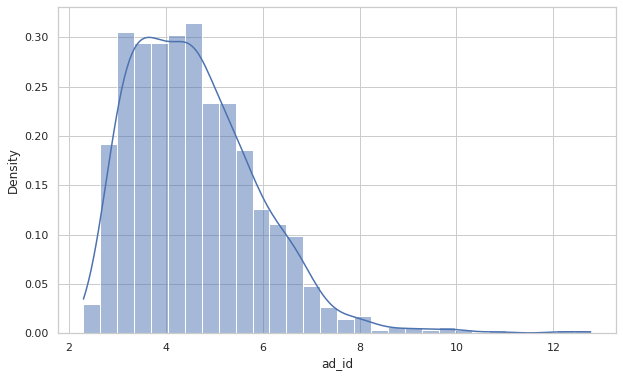

In [150]:
fig, ax=plt.subplots(figsize=(10,6))
sns.histplot(data=log_views, kde=True, stat='density', ax=ax)

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

Могут пригодиться:

pivot()
скользящее среднее

In [151]:
daily_ad_views = ads_data.loc[ads_data.event =='view'].pivot_table(index='ad_id',
                                                                   columns='date',
                                                                  values='time',
                                                                   aggfunc='count')

In [152]:
daily_ad_views

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN
...,...,...,...,...,...,...
122004,85.0,15.0,NaN,NaN,NaN,NaN
122013,NaN,NaN,NaN,134.0,22.0,NaN
122023,NaN,NaN,NaN,53.0,15.0,NaN


In [153]:
mean_viewss= daily_ad_views.mean()

In [154]:
mean_viewss

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [155]:
roling_dili = daily_ad_views.mean().rolling(window=2).mean().round(0)

In [156]:
roling_dili

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [157]:
roling_dili['2019-04-06']

598.0

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



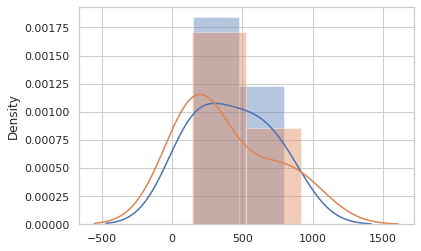

In [158]:
sns.distplot(roling_dili)
sns.distplot(mean_viewss)

In [159]:
px.bar(roling_dili)

In [160]:
px.bar(mean_viewss)

Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).
- **Как делать это задание?**
    
    Сначала объедините датафрэйм с рекламой с датафрэймом с клиентами по колонке `client_union_id`.
    
    Затем переведите колонки со временем во временной тип, и вычтите из колонки date рекламного датафрэйма (дата рекламного события) дату регистрации клиента (`create_date`), задав это в колонку. 
    
    После этого сгруппируйте данные по клиенту и возьмите разницу, посчитанную в предыдущем предложении, и соответствующую первому запуску рекламы. 
    
    Потом возьмите среднее
    
- **Какая-какая нужна** `date` **для подсчёта разницы?**
    
    Берите `date` из датафрэйма с рекламными событиями
    
- **Как посчитать разницу между временами?**
    
    Просто вычтите из одной колонке временного типа другую такую колонку. Это даст колонку типа `timedelta`
    
    Например,
    
    ```python
    df.time1 - df.time2
    ```
    
    Вернёт колонку с разницей между соответствующими ячейками колонки `time1` и `time2`
    
- **Какая разница времён соответствует самому первому запуску рекламы?**
    
    Чем первее запуск рекламы клиентом, тем ближе эта дата к дате регистрации клиента (прошло меньше времени между его регистрацией и запуском первой рекламы, чем между его регистрацией и запуском шестой рекламы). Поэтому нужно брать минимальную временную разницу

In [161]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [162]:
merget = ads_clients_data.merge(ads_data, on = 'client_union_id', suffixes=('_client_data', '_ad_data'))

In [163]:
merget

,date_client_data,client_union_id,community_id,create_date,date_ad_data,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 21:54:35,view,android,122078,122078,CPC,56.4,0,32354
999996,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:26:58,view,web,122078,122078,CPC,56.4,0,32354
999997,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:32:34,view,android,122078,122078,CPC,56.4,0,32354
999998,2020-05-07,122078,-130558729,2019-01-22,2019-04-04,2019-04-03 22:43:03,view,ios,122078,122078,CPC,56.4,0,32354


In [164]:
merget['diferens'] = merget.date_ad_data - merget.create_date

In [165]:
first_add = merget.groupby('client_union_id').diferens.min()

In [166]:
first_add.mean()

Timedelta('124 days 09:04:43.532219570')

In [167]:
first_add.mean().days

124

In [168]:
threshold=pd.Timedelta(365, unit='day')

In [169]:
it_365 = first_add.loc[first_add < threshold]

In [170]:
it_365

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: diferens, Length: 838, dtype: timedelta64[ns]

In [171]:
np.round(len(it_365)/ ads_clients_data.client_union_id.nunique()*100, 2)

0.69

In [172]:
bins = [0, 30, 90, 180, 365]

In [173]:
bins

[0, 30, 90, 180, 365]

In [174]:
bins=[pd.Timedelta(x, 'd') for x in bins]

In [175]:
bins

[Timedelta('0 days 00:00:00'),
 Timedelta('30 days 00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('180 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [176]:
labels = ['0 - 30', '30 - 90', '90 - 180', '180 - 365']

In [182]:
binned_first = pd.cut(first_add, bins, labels=labels)

In [186]:
binned_first

client_union_id
1         90 - 180
9         90 - 180
13         30 - 90
16        90 - 180
20         30 - 90
            ...   
122004     30 - 90
122013    90 - 180
122023    90 - 180
122031    90 - 180
122078     30 - 90
Name: diferens, Length: 838, dtype: category
Categories (4, object): ['0 - 30' < '30 - 90' < '90 - 180' < '180 - 365']

In [187]:
binned_first.value_counts()

90 - 180     396
30 - 90      263
180 - 365    168
0 - 30        11
Name: diferens, dtype: int64

In [188]:
px.bar(binned_first.value_counts())